# Inroduction to Data Science (Term Project)
### Predicting the quality of red wine based on its physicochemical properties
#### Team Members:
* Ayush Basak 19ucc016
* Surendra Kumar 19ucc018
* Siddhartha Singh 19ucs167
* Raja Kumar Singh 19ucc019

Dataset: [archive.ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

In [ ]:
## Uploading dataset directly from hard drive
from google.colab import files
upload = files.upload()

Saving winequality-red.csv to winequality-red.csv


Importing necessary libraries

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Read dataset using pandas and produce first 5 rows

In [123]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [125]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [126]:
bins = [0, 5, 10]
df['quality'] = pd.cut(df['quality'], bins = bins, labels = ['Bad', 'Good'])

In [ ]:
df['quality']

0        Bad
1        Bad
2        Bad
3       Good
4        Bad
        ... 
1594     Bad
1595    Good
1596    Good
1597     Bad
1598    Good
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['Bad' < 'Good']

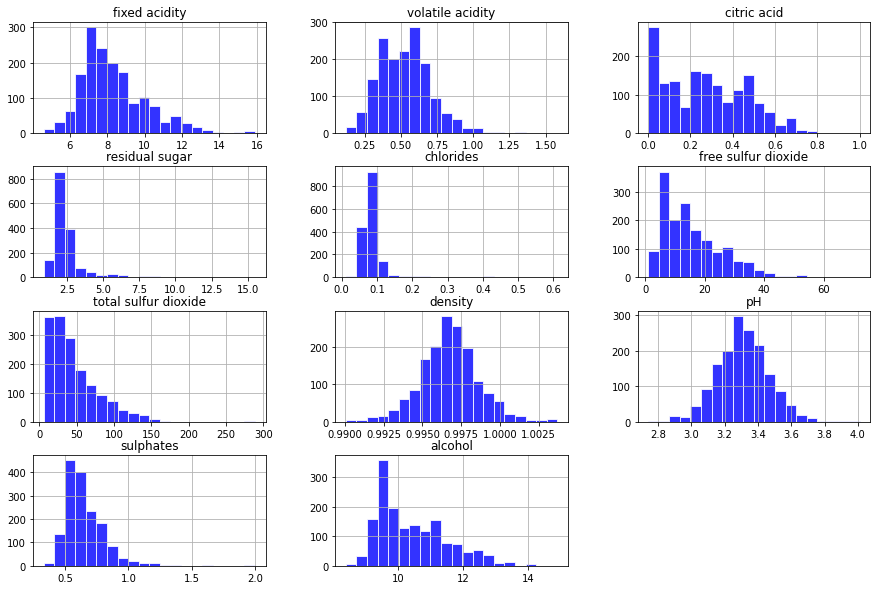

In [127]:
df.hist(figsize=(15,10), ec="white", bins=20, color='blue', alpha=0.8)
plt.show()

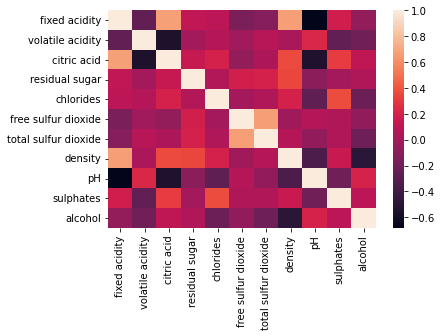

In [129]:
sns.heatmap(df.corr())

In [130]:
df['quality'].value_counts()

Good    855
Bad     744
Name: quality, dtype: int64

In [131]:
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])

In [132]:
df['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
X = df.drop(['quality'], axis=1)
y = df.loc[:,['quality']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [ ]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1279, 11)
X_test shape (320, 11)
y_train shape (1279, 1)
y_test shape (320, 1)


In [133]:
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
X_train = scaler_1.fit_transform(X_train)
X_test = scaler_2.fit_transform(X_test)

# Logistic Regression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_prediction = LR_model.predict(X_test)

In [137]:
score = accuracy_score(y_test, y_prediction)
print("Accuracy: ", score*100, "%")

Accuracy:  71.5625 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

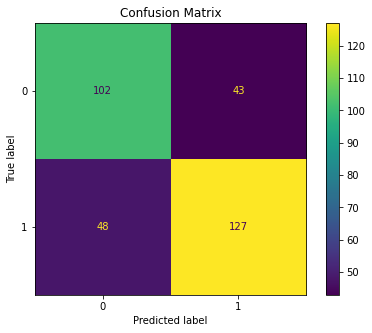

In [138]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(LR_model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')

# Decision Tree Classifier

In [146]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)
y_prediction = DTC_model.predict(X_test)

In [147]:
score = accuracy_score(y_test, y_prediction)
print("Accuracy: ", score*100, "%")

Accuracy:  67.1875 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

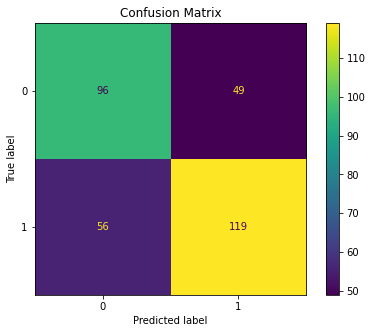

In [148]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(DTC_model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')

# Random Forest Classifer

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_prediction = RF_model.predict(X_test)

In [144]:
score = accuracy_score(y_test, y_prediction)
print("Accuracy: ", score*100, "%")

Accuracy:  72.1875 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

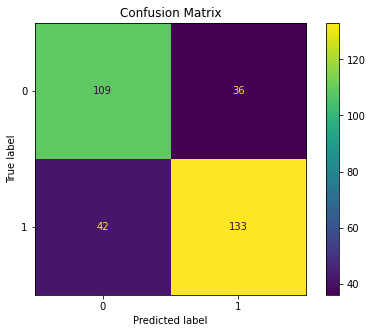

In [145]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(RF_model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')

# Support Vector Machines

In [ ]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
y_prediction = SVM_model.predict(X_test)

In [116]:
score = accuracy_score(y_test, y_prediction)
score

0.721875

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

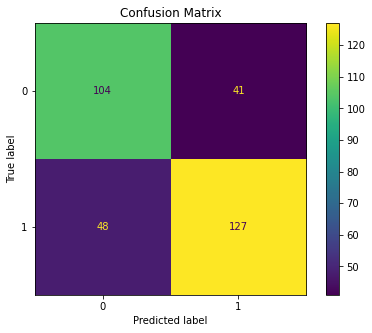

In [117]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(SVM_model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')